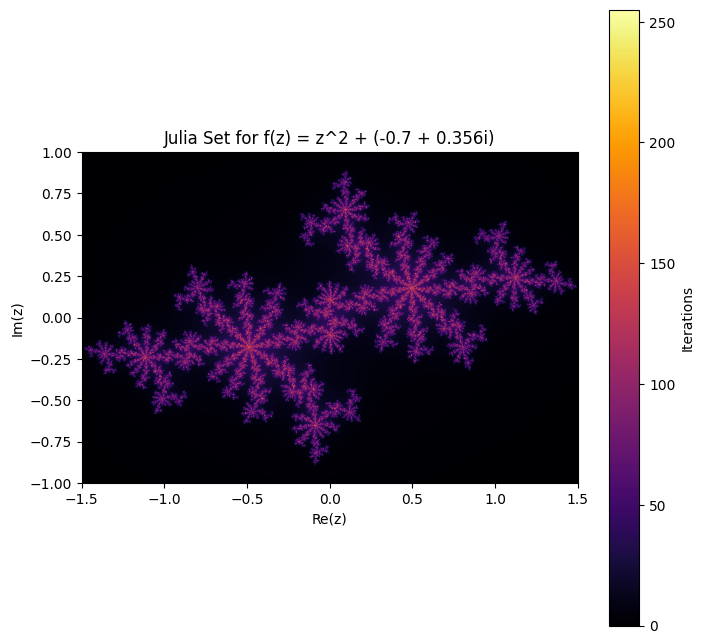

In [1]:
#a 

import numpy as np
import matplotlib.pyplot as plt

width, height = 800, 800
xmin, xmax, ymin, ymax = -1.5, 1.5, -1, 1
c = complex(-0.7, 0.356)
max_iter = 256

#pixel grid
x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

julia = np.zeros(Z.shape, dtype=int)

for i in range(max_iter):
    mask = np.abs(Z) < 2  
    Z[mask] = Z[mask]**2 + c
    julia[mask] = i

plt.figure(figsize=(8, 8))
plt.imshow(julia, extent=(xmin, xmax, ymin, ymax), cmap='inferno')
plt.colorbar(label='Iterations')
plt.title("Julia Set for f(z) = z^2 + (-0.7 + 0.356i)")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.savefig("julia_set.png", dpi=300)
plt.show()


Convex Hull Area: 6.743037489354998


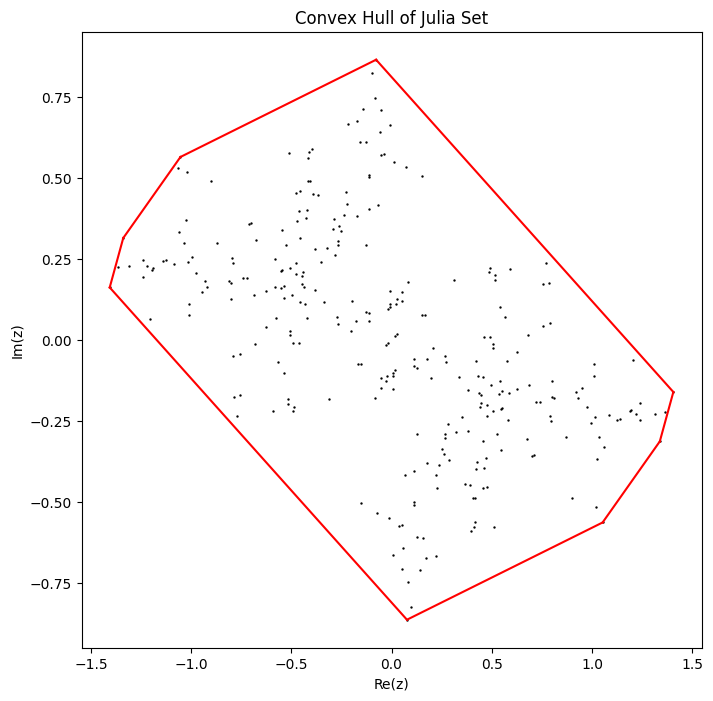

<Figure size 640x480 with 0 Axes>

In [9]:
#b 

from scipy.spatial import ConvexHull

width, height = 800, 800
xmin, xmax, ymin, ymax = -1.5, 1.5, -1, 1
c = complex(-0.7, 0.356)
max_iter = 256

x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

julia = np.zeros(Z.shape, dtype=int)
points = []

for i in range(max_iter):
    mask = np.abs(Z) < 2  
    Z[mask] = Z[mask]**2 + c
    julia[mask] = i

#extract points that belong to the julia set 
threshold = max_iter - 1
for i in range(width):
    for j in range(height):
        if julia[j, i] == threshold:
            points.append([x[i], y[j]])

points = np.array(points)

#compute convex hull and area 
if len(points) > 2:
    hull = ConvexHull(points)
    area = hull.area
    print(f"Convex Hull Area: {area}")

    
    plt.figure(figsize=(8, 8))
    plt.scatter(points[:, 0], points[:, 1], s=0.5, color='black')
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
    plt.title("Convex Hull of Julia Set")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.show() 
    plt.savefig("Convex Hull of Julia Set")
else:
    print("Not enough points to compute a convex hull.")


Enclosed Contour Area: 0.005976562500002558


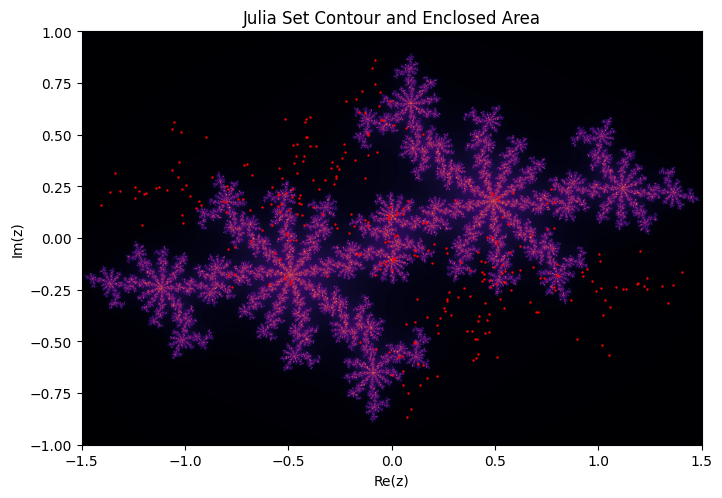

<Figure size 640x480 with 0 Axes>

In [11]:
#c 

width, height = 800, 800
xmin, xmax, ymin, ymax = -1.5, 1.5, -1, 1
c = complex(-0.7, 0.356)
max_iter = 256


x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

julia = np.zeros(Z.shape, dtype=int)

for i in range(max_iter):
    mask = np.abs(Z) < 2  
    Z[mask] = Z[mask]**2 + c
    julia[mask] = i


edges = np.zeros_like(julia, dtype=bool)
for i in range(1, width - 1):
    for j in range(1, height - 1):
        if julia[j, i] == max_iter - 1:
            if (julia[j-1, i] < max_iter - 1 or julia[j+1, i] < max_iter - 1 or
                julia[j, i-1] < max_iter - 1 or julia[j, i+1] < max_iter - 1):
                edges[j, i] = True


edge_points = np.column_stack(np.where(edges))
real_coords = xmin + (edge_points[:, 1] / width) * (xmax - xmin)
imag_coords = ymin + (edge_points[:, 0] / height) * (ymax - ymin)

#compute area using greens theorem
x_shifted = np.roll(real_coords, 1)
y_shifted = np.roll(imag_coords, 1)
area = 0.5 * np.abs(np.dot(real_coords, y_shifted) - np.dot(imag_coords, x_shifted))

print(f"Enclosed Contour Area: {area}")


plt.figure(figsize=(8, 8))
plt.imshow(julia, extent=(xmin, xmax, ymin, ymax), cmap='inferno')
plt.scatter(real_coords, imag_coords, s=0.5, color='red')
plt.title("Julia Set Contour and Enclosed Area")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.show() 
plt.savefig("Julia Contour")




Estimated Fractal Dimension: -0.9346035967588728


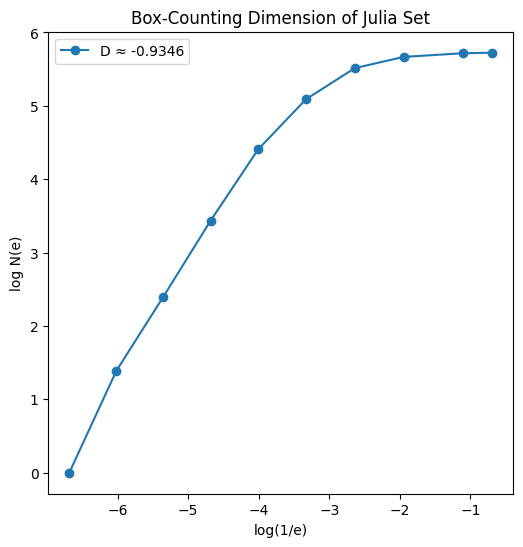

<Figure size 640x480 with 0 Axes>

In [12]:
#d 

width, height = 800, 800
xmin, xmax, ymin, ymax = -1.5, 1.5, -1, 1
c = complex(-0.7, 0.356)
max_iter = 256


x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y


julia = np.zeros(Z.shape, dtype=int)

for i in range(max_iter):
    mask = np.abs(Z) < 2  
    Z[mask] = Z[mask]**2 + c
    julia[mask] = i

#Julia set to binary image 
binary_julia = (julia == max_iter - 1).astype(int)


def box_counting(binary_image):
    sizes = np.logspace(1, np.log2(min(width, height)) / np.log2(2), num=10, base=2, dtype=int)
    counts = []
    
    for size in sizes:
        num_boxes = 0
        for i in range(0, width, size):
            for j in range(0, height, size):
                if np.any(binary_image[j:j+size, i:i+size]):
                    num_boxes += 1
        counts.append(num_boxes)
    
    sizes = 1 / sizes  #convert boxs sizes to e
    return sizes, counts


sizes, counts = box_counting(binary_julia)
log_sizes = np.log(sizes)
log_counts = np.log(counts)

#fit line to estimate fractal dimension
coeffs = np.polyfit(log_sizes, log_counts, 1)
fractal_dimension = -coeffs[0]

print(f"Estimated Fractal Dimension: {fractal_dimension}")


plt.figure(figsize=(6, 6))
plt.plot(log_sizes, log_counts, 'o-', label=f"D ≈ {fractal_dimension:.4f}")
plt.xlabel("log(1/e)")
plt.ylabel("log N(e)")
plt.title("Box-Counting Dimension of Julia Set")
plt.legend()
plt.show()
plt.savefig("Box Counting Julia")